### **Pandas Dataframes**
Pandas stands for "Panel Data", where "panel" basically means *table* or *spreadsheet*,  
that is, data arranged in rows and columns.  
- In Pandas, this spreadsheet-like data structure is called a **dataframe**.
- Unlike a spreadsheet, such as an Excel worksheet, a Pandas dataframe exists as a *variable*.  
- A dataframe is a two-dimensional **matrix** of rows and columns, having a **shape** property,  
 as a **tuple**. A 10-row x 4-column dataframe has a shape of (10, 4)
- A single row or column of a dataframe exists as a one-dimensional vector, called a **Series**.
- Numpy terms such as shape, dimensions, matrix, vector and tuple apply to dataframes, too,  
because Pandas is built on top of Numpy.  
- Like Numpy, Pandas must be imported.

In this lesson, we will learn how to:
- make a Pandas dataframe from multiple lists, one list per column
- make a Pandas dataframe from a dictionary, where each key value is a list
- select ranges of dataframe rows and/or columns by index number
- select ranges of dataframe rows and/or columns by column name
- use **loc** and **iloc** syntax to select data
- filter data based on a condition
- filter data based on multiple conditions
- add rows of data to an existing dataframe
- add columns to an existing dataframe
- get / set individual values from a dataframe
- make a Pandas Series (1D data structure) from a 2D Dataframe
- use **list()** and **tolist()** methods to convert a Numpy array or Panda Series to a list

**Pandas DataFrame**: two-dimensional data structure, consising of rows and columns.

- Dataframes are often made from loaded data, such as from a **CSV** file,  
but they can be made from lists, arrays or dictionaries, which is how we will start.
- **DataFrame()** method returns a dataframe
- if provided no arguments, DataFrame() returns a new, empty dataframe
- DataFrame() can takes a 2D array or a dictionary as its argument,  
in which case it returns a dataframe with data already in it

In [ ]:
# if import pandas doesn't work:
%pip install pandas
# %pip install IPython.display
# ON LOCAL MACHINE (e.g. VSCode NOT Google Colab)
# You MAY need to INSTALL -- NOT just IMPORT numpy and/or pandas
# Which MAY result in ERROR, which can be troubleshot as follows:
# if installing pandas doesn't work
# uninstall numpy and pandas and then
# FORCE reinstall both, clearing all cache:
# %pip uninstall -y numpy pandas
# %pip install numpy pandas --no-cache-dir --force-reinstall

In [1]:
# 0. import modules:
import numpy as np
import pandas as pd
from IPython.display import Image
import random
import string # for auto-generating sequences of letters (a-z, A-Z)
import pprint as pp
import sys

In [2]:
# print the version of numpy:
# versions 2+ prints 21 (and other numbers) like so: np.int64(21)
# BUT we just want 21 to print as 21
# so check version of Numpy:
print(np.__version__, sys.version)

1.23.5 3.10.9 (main, Mar  1 2023, 12:33:47) [Clang 14.0.6 ]


In [ ]:
# if numpy version is 2+, set it lower to fix annoying printing of numbers:
# np.set_printoptions(legacy='1.23.5')

/var/folders/js/zv6c_nmx1vbdnr3f03zqdsc00000gn/T/ipykernel_45937/2970553453.py:2: UserWarning: legacy printing option can currently only be '1.13', '1.21', or `False`
  np.set_printoptions(legacy='1.23.5')


In [3]:
# 1. make a numpy array of consecutive integers from 21-84; 
#    reshape (64,) vector into (8,8) matrix
chessboard_arr = np.arange(21,85).reshape(8,8)
print(chessboard_arr.shape)
print()
print(chessboard_arr)

(8, 8)

[[21 22 23 24 25 26 27 28]
 [29 30 31 32 33 34 35 36]
 [37 38 39 40 41 42 43 44]
 [45 46 47 48 49 50 51 52]
 [53 54 55 56 57 58 59 60]
 [61 62 63 64 65 66 67 68]
 [69 70 71 72 73 74 75 76]
 [77 78 79 80 81 82 83 84]]


In [4]:
# 3. Make a Pandas DataFrame from the chessboard array:
chessboard_df = pd.DataFrame(chessboard_arr)

In [5]:
# 4. Output -- don't print -- the df:
print(chessboard_df.shape, chessboard_df.ndim) # (8, 8) 2
chessboard_df

(8, 8) 2


,0,1,2,3,4,5,6,7
0,21,22,23,24,25,26,27,28
1,29,30,31,32,33,34,35,36
2,37,38,39,40,41,42,43,44
3,45,46,47,48,49,50,51,52
4,53,54,55,56,57,58,59,60
5,61,62,63,64,65,66,67,68
6,69,70,71,72,73,74,75,76
7,77,78,79,80,81,82,83,84


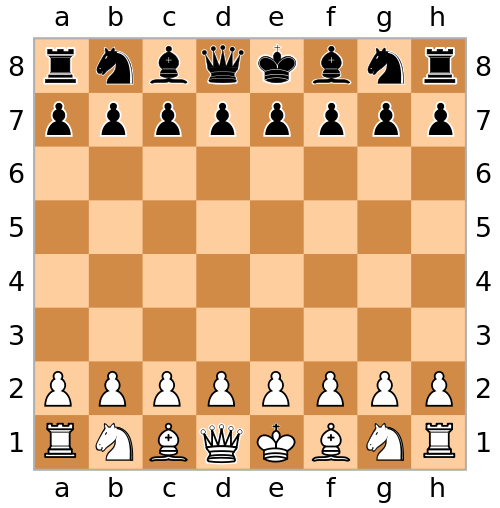

In [6]:
Image("https://static.guides.co/a/uploads/1194%2F500px-Chess_board_blank.svg.png")

In [7]:
# 5. Make the chessboard df again, but this time
#.   supply column headers as letters from a-h
#    also, number the rows from 1-8 in descending order
col_names = ['a','b','c','d','e','f','g','h']
row_names = [8,7,6,5,4,3,2,1]

chessboard_df = pd.DataFrame(chessboard_arr,
        columns=col_names, index=row_names)

chessboard_df

,a,b,c,d,e,f,g,h
8,21,22,23,24,25,26,27,28
7,29,30,31,32,33,34,35,36
6,37,38,39,40,41,42,43,44
5,45,46,47,48,49,50,51,52
4,53,54,55,56,57,58,59,60
3,61,62,63,64,65,66,67,68
2,69,70,71,72,73,74,75,76
1,77,78,79,80,81,82,83,84


In [8]:
# challenge: make this list w code: [8,7,6,5,4,3,2,1]
row_names_dynamic = list(range(8,0,-1))
print(row_names_dynamic)

[8, 7, 6, 5, 4, 3, 2, 1]


#### **string module**.
```python
import string
```
The string module is for dynamically generating sequences of letters and digits:

string.ascii_lowercase → 'abcdefghijklmnopqrstuvwxyz'

string.ascii_uppercase → 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

string.ascii_letters → lowercase + uppercase (ascii_lowercase + ascii_uppercase)

string.digits → '0123456789'

In [9]:
# 7. Make the chessboard df again, but this time
#.   supply column headers as letters from a-h dynamically
# list('apple') => ['a','p','p','l','e']
col_names_dynamic = list(string.ascii_lowercase[:8])
print(col_names_dynamic)
#.   using the string.lower_case (or string.letters)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']


In [10]:
chessboard_df = pd.DataFrame(chessboard_arr,
                columns=col_names_dynamic,
                index=row_names_dynamic)

chessboard_df

,a,b,c,d,e,f,g,h
8,21,22,23,24,25,26,27,28
7,29,30,31,32,33,34,35,36
6,37,38,39,40,41,42,43,44
5,45,46,47,48,49,50,51,52
4,53,54,55,56,57,58,59,60
3,61,62,63,64,65,66,67,68
2,69,70,71,72,73,74,75,76
1,77,78,79,80,81,82,83,84



### **df.iloc[row_index,col_index]**  
gets a dataframe row as **series**.  
The single square brackets indicate a 1D selection
**iloc** stands for *integer location*

In [11]:
# 8 Get the first row as a Series (1D vector)
first_row_series = chessboard_df.iloc[0]
print(first_row_series.shape) # (8,) 1
print()
print(first_row_series)
print(type(first_row_series))
print("List:", list(first_row_series))
print()
print("Dict:", dict(first_row_series))


(8,)

a    21
b    22
c    23
d    24
e    25
f    26
g    27
h    28
Name: 8, dtype: int64
<class 'pandas.core.series.Series'>
List: [21, 22, 23, 24, 25, 26, 27, 28]

Dict: {'a': 21, 'b': 22, 'c': 23, 'd': 24, 'e': 25, 'f': 26, 'g': 27, 'h': 28}


In [26]:
# 9. Get the first row as its own DataFrame (matrix 2D): df.iloc[[row_index,col_index]]
# to do this, put TWO sets of [[]] after iloc; the number of [] equals the num dimensions, and a df is 2D
first_row_df = chessboard_df.iloc[[0]]
print(first_row_df.shape) # (1, 8) 2
first_row_df


(1, 8)


,a,b,c,d,e,f,g,h
8,21,22,23,24,25,26,27,28


In [22]:
# 10. Get the last row as its own df: df.iloc[row_index,col_index]
last_row_df = chessboard_df.iloc[[-1]]
print(last_row_df.shape) # (1, 8)
last_row_df


(1, 8)


,a,b,c,d,e,f,g,h
1,77,78,79,80,81,82,83,84


In [30]:
# 11. Make new df of middle 4 rows (all cols)
# so, all but first and last 2 rows:
# df.iloc[row_start_index:row_end_index_excl,start_col_index:end_col_index_excl]
# [row_range,:] means row range, all columns
# [:,col_range] means all rows, col range
mid_4_rows_df = chessboard_df.iloc[2:6]
print(mid_4_rows_df.shape) # (4, 8)
mid_4_rows_df


(4, 8)


,a,b,c,d,e,f,g,h
6,37,38,39,40,41,42,43,44
5,45,46,47,48,49,50,51,52
4,53,54,55,56,57,58,59,60
3,61,62,63,64,65,66,67,68


In [31]:
# 12. Challenge: Make new df of middle 4 rows middle 4 cols
mid_4x4_df = chessboard_df.iloc[2:6,2:6]
print(mid_4x4_df.shape) # (4, 4)
mid_4x4_df



(4, 4)


,c,d,e,f
6,39,40,41,42
5,47,48,49,50
4,55,56,57,58
3,63,64,65,66


In [35]:
# 13. Challenge: make a new df called ttt_ur_df
# as tic-tac-toe board using upper right 3x3 corner of the chessboard
# chessboard_df.iloc[first_3_rows,last_3_cols]
ttt_ur_df = chessboard_df.iloc[:3,-3:]
print(ttt_ur_df.shape) # (3, 3)
ttt_ur_df

(3, 3)


,f,g,h
8,26,27,28
7,34,35,36
6,42,43,44


In [38]:
# 14. Make a DF of every other row using step (2)
every_other_row = chessboard_df.iloc[::2]
print(every_other_row.shape) # (4, 8)
every_other_row

(4, 8)


,a,b,c,d,e,f,g,h
8,21,22,23,24,25,26,27,28
6,37,38,39,40,41,42,43,44
4,53,54,55,56,57,58,59,60
2,69,70,71,72,73,74,75,76


In [ ]:
# 13. Challenge: make a new df of 3 first rows, 1 col (3rd from last col "f")
# to get a one-col range with iloc do n:n+1
_1x3_df = chessboard_df.iloc[:3,5:6]
print(_1x3_df.shape) # (3, 3)
_1x3_df

In [50]:
# 15. Challenge: Make a DF of every other row AND every other col?
# 4x4 : rows: 8,6,4,2 cols: a c e g
every_other_df = chessboard_df.iloc[::2,::2]
print(every_other_df.shape) # (4, 4)
every_other_df
 

(4, 4)


,a,c,e,g
8,21,23,25,27
6,37,39,41,43
4,53,55,57,59
2,69,71,73,75


In [51]:
# 16. Set the middle 4 rows, all squares, to empty spaces
# (like a chessboard at start of game)
chessboard_df.iloc[2:6,:] = ""

In [52]:
chessboard_df

,a,b,c,d,e,f,g,h
8,21,22,23,24,25,26,27,28
7,29,30,31,32,33,34,35,36
6,,,,,,,,
5,,,,,,,,
4,,,,,,,,
3,,,,,,,,
2,69,70,71,72,73,74,75,76
1,77,78,79,80,81,82,83,84


In [63]:
# 17. Set the pawn rows to "P"
# (like a chessboard at start of game)
# for rows that are not contiguous (not consecutive)
# specify rows as a list, in this case [1,6]
# chessboard_df.iloc[1] = "P"
# chessboard_df.iloc[-2] = "P"
chessboard_df.iloc[[1,-2],:] = "P"

In [64]:
chessboard_df

,a,b,c,d,e,f,g,h
8,21,22,23,24,25,26,27,28
7,P,P,P,P,P,P,P,P
6,,,,,,,,
5,,,,,,,,
4,,,,,,,,
3,,,,,,,,
2,P,P,P,P,P,P,P,P
1,77,78,79,80,81,82,83,84


In [75]:
# 18. Set the 4 corners to "R" (for rook)
# (like a chessboard at start of game)
chessboard_df.iloc[[0,-1],[0,-1]] = "R"

In [69]:
# 19. Clallenge: Set the Knights, as "Kn", next to each rook
# (like a chessboard at start of game)
chessboard_df.iloc[[0,-1],[1,-2]] = "Kn"

In [71]:
# 20. Clallenge: set the Bishops, as "B", next to each Knight
# (like a chessboard at start of game)
chessboard_df.iloc[[0,-1],[2,-3]] = "B"

In [73]:
# 21. Challenge: set the Kings and Queens to "K" and "Q":
chessboard_df.iloc[[0,-1],3] = "Q"
chessboard_df.iloc[[0,-1],4] = "K"

In [76]:
chessboard_df

,a,b,c,d,e,f,g,h
8,R,Kn,B,Q,K,B,Kn,R
7,P,P,P,P,P,P,P,P
6,,,,,,,,
5,,,,,,,,
4,,,,,,,,
3,,,,,,,,
2,P,P,P,P,P,P,P,P
1,R,Kn,B,Q,K,B,Kn,R


**df.loc[row_name_start:row_name_end,col_name_start:col_name_end]**
- **for selecting by names, rather than index numbers**
- **loc** stands for *location* (iloc is INDEX location)
- if row names are same as row index, the row numbers ARE the names
- row and col end values are *inclusive* (included in result)
- loc is user-friendly (easier to remember "last_name" than col 14)

In [83]:
# df.loc[row_name,col_name_incl]
# re-do the chess pieces using .loc
# range end is INCLUSIVE w .loc
# range end is EXCLUSIVE w .iloc
chessboard_df.loc[6:3,:] = ""
chessboard_df.loc[[7,2],:] = "P"
chessboard_df.loc[[8,1],['a','h']] = "R"
chessboard_df.loc[[8,1],['b','g']] = "Kn"
chessboard_df.loc[[8,1],['c','f']] = "B"
chessboard_df.loc[[8,1],'d'] = "Q"
chessboard_df.loc[[8,1],'e'] = "K"

In [84]:
chessboard_df

,a,b,c,d,e,f,g,h
8,R,Kn,B,Q,K,B,Kn,R
7,P,P,P,P,P,P,P,P
6,,,,,,,,
5,,,,,,,,
4,,,,,,,,
3,,,,,,,,
2,P,P,P,P,P,P,P,P
1,R,Kn,B,Q,K,B,Kn,R


**Starting with a new, empty DataFrame**.  

- You can make a new, empty dataframe, and then assign the data after the fact.
- The data can be assigned as lists, one per column.
- The list length results in that many rows in the dataframe.
- To avoid ragged rows problem, make sure all lists are of equal length

In [86]:
# 22. Using the provided raw data, declare 4 lists of 4 items each
food = ["T-Bone Steak","Pizza","Hamburger","Garden Salad"]
prices = [49.99, 19.99, 15.75, 12.99]
cals = [700, 500, 600, 350]
is_vegan = [False, False, False, True]

In [85]:
# 23. Declare a new empty dataframe
food_df = pd.DataFrame()

In [87]:
# 24. Declare columns for the DF, to do so, put df["new col"] and assign list; length of lists must all be equal and must equal number of rows
food_df["item"] = food
food_df["price"] = prices
food_df["cals"] = cals
food_df["vegan"] = is_vegan

In [88]:
print(food_df.shape)
food_df

(4, 4)


,item,price,cals,vegan
0,T-Bone Steak,49.99,700,False
1,Pizza,19.99,500,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True


In [ ]:
# set the datatypes of the various columns, so that we cannot accidentally set, say, a float to a string..
food_df = food_df.astype({ 
    "item": "string", 
    "price": "Float64", 
    "cals": "Int64", 
    "vegan": "boolean" 
})

**Series**: A dictionary-like 1D vector extracted from a df
- series can be from ONE row or col
- series "comes with" col names as keys
- having keys, a series is more like a dictionary than a list 
- you can listify a series two ways:
    - list(series)
    - series.tolist()

In [ ]:
# 25. Challenge: get the pizza row -- the result is a 1D Series
pizza_series = food_df.iloc[1]

print(pizza_series.shape) # (4,)
print(pizza_series)

# make a list from the series -- this purges the col names, leaving just the values
pizza_list = list(pizza_series)
print(pizza_list) # ['Pizza', 19.99, 500, False]

# series.tolist() listifies a series (throws out the column name keys)
pizza_list_direct = food_df.iloc[1].tolist()
print(pizza_list_direct)

# make a dict from the series -- this uses the col names as the keys
pizza_dict = dict(pizza_series)
print(pizza_dict) # {'Item': 'Pizza', 'Price': 19.99, 'Cals': 500, 'Vegan': False}

(4,)
item     Pizza
price    19.99
cals       500
vegan    False
Name: 1, dtype: object
['Pizza', 19.99, 500, False]
['Pizza', 19.99, 500, False]
{'item': 'Pizza', 'price': 19.99, 'cals': 500, 'vegan': False}


### **df.iloc[[num]]**  
- To get a dataframe slice as a 2D dataframe--not just as a 1D series--use iloc with double square brackets.  
- The **[ [ num ] ]** indicate a 2D selection

In [96]:
# 26. Get the pizza row using .iloc -- BUT as a 2D DataFrame (1,4)
# the way to go from series to df is to use double [[]]
# pizza_df = food_df.iloc[[1]]
# this way also works
pizza_df = food_df.iloc[[1]]
print(pizza_df.shape) # (1,4) 2
pizza_df

(1, 4)


,item,price,cals,vegan
1,Pizza,19.99,500,False


### **df.iloc[row,col]**
To get an individual piece of data, look it up by row and column as you would in a Numpy array

In [100]:
# 27. Get the word "Pizza" using .loc
second_item = food_df.loc[1,"item"]
print(second_item, type(second_item))

Pizza <class 'str'>


In [ ]:
# 28. Using iloc, get the first 3 rows and first 3 cols of food_df:
# (all cols except vegan):
food_df.iloc[:3,:3]

In [107]:
# 29. Challenge: Except same thing as above BUT using loc: get the first 3 rows, first 3 cols
# iloc is exclusive, but loc is inclusive, so just go to row 2
food_df.loc[:2,'item':'cals']

,item,price,cals
0,T-Bone Steak,49.99,700
1,Pizza,19.99,500
2,Hamburger,15.75,600


In [110]:
# 30. Using .iloc on food_df, get first 2 rows, first 2 cols
food_df.iloc[:2,:2]

,item,price
0,T-Bone Steak,49.99
1,Pizza,19.99


In [111]:
# 31. Do the .loc version of the above (first 2 rows, first 2 cols)
food_df.loc[:1,'item':'price']

,item,price
0,T-Bone Steak,49.99
1,Pizza,19.99


**selecting non-contiguous rows and non-contiguous columns**  
- **df.iloc[[row_index,row_index],[col_index,col_index]]**
- **df.loc[[row_name,row_name],[col_name,col_name]]**
- pass in lists of row and column indexes

In [114]:
# 33. Using iloc get first 2 rows, but non-contiguous cols: "Item" and "Cals"
food_df.iloc[:2,[0,2]]

,item,cals
0,T-Bone Steak,700
1,Pizza,500


In [ ]:
# 32. Using loc get first 2 rows, but non-contiguous cols: "Item" and "Cals"
# food_df.loc[:1,['item','cals']]
# this also works: all cols, but skip
food_df.loc[:1,::2]

In [ ]:
# 34. Using loc get non-contiguous first and last rows, "Item" and "Cals" cols
# .loc does not support negative indexing, cuz loc goes by name, not by index
food_df.loc[[0,3],['item','cals']]
# food_df.loc[::3,['item','cals']]

In [ ]:
# using loc, dynamically get the first and last rows, selected columns: the name of the row equals the length of the df - 1
food_df.loc[[0,len(food_df)-1],['item','cals']]

In [127]:
# 35. Using iloc get non-contiguous first and last rows, "Item" and "Cals" cols
food_df.iloc[[0,-1],[0,2]]

,item,cals
0,T-Bone Steak,700
3,Garden Salad,350


### **Selecting DataFrame rows by column value condition**
**new_df = df[ df['col_name'] boolean_condition ]**
- to select only rows where a specific column values meets a condition,  
put the column and condition inside square brackets
- the condition is expressed as a **boolean comparison (==, <, >, <=, >=, !=)**
- every row where the column boolean comparison is **True** is included in the result

In [128]:
# 36. Get all food_df rows of max 500 cals
max_500_cal_df = food_df[ food_df["cals"] <= 500 ]  
max_500_cal_df 

,item,price,cals,vegan
1,Pizza,19.99,500,False
3,Garden Salad,12.99,350,True


In [129]:
# 36B. Get all food_df rows of min 500 cals
min_500_cal_df = food_df[ food_df["cals"] >= 500 ]  
min_500_cal_df 

,item,price,cals,vegan
0,T-Bone Steak,49.99,700,False
1,Pizza,19.99,500,False
2,Hamburger,15.75,600,False


In [ ]:
# 37. Get only non-vegan food items:
non_vegan_df = food_df[ food_df['vegan'] == False ]
non_vegan_df

,item,price,cals,vegan
0,T-Bone Steak,49.99,700,False
1,Pizza,19.99,500,False
2,Hamburger,15.75,600,False


In [132]:
# 37B. Get all the vegan rows into a new df
# if the col value is a boolean it is ALREADY True or False, so True == True is redundant, so drop == True
vegan_df = food_df[ food_df['vegan'] ]
vegan_df

,item,price,cals,vegan
3,Garden Salad,12.99,350,True


In [133]:
# 38. Use ~ tilda in front of ~df["col_name"] condition
# to get all rows where the condtion is False
# get all NON-Vegan rows:
non_vegan_df = food_df[ ~food_df['vegan'] ]
non_vegan_df

,item,price,cals,vegan
0,T-Bone Steak,49.99,700,False
1,Pizza,19.99,500,False
2,Hamburger,15.75,600,False


**adding a new row to a dataframe**
- **df.loc[num]** for location indicates a row number
- specify the new next row number and set it equal to a list of values, one per column

In [134]:
# 39. Make a new_item list to add to the df
new_item = ["Fruit Salad", 13.50, 320, True]
food_df.loc[4] = new_item

In [135]:
print(food_df.shape)
food_df

(5, 4)


,item,price,cals,vegan
0,T-Bone Steak,49.99,700,False
1,Pizza,19.99,500,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True


In [ ]:
# 41. Add Bison Burger to the df at next available row position
food_df.loc[5] = ["Bison Burger", 18.50, 820, False]

In [138]:
print(food_df.shape)
food_df

(6, 4)


,item,price,cals,vegan
0,T-Bone Steak,49.99,700,False
1,Pizza,19.99,500,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
5,Bison Burger,18.50,820,False


In [139]:
# 42. Increase the new item price by $1 with += operator:
food_df.loc[5,"price"] += 1

In [140]:
print(food_df.shape)
food_df

(6, 4)


,item,price,cals,vegan
0,T-Bone Steak,49.99,700,False
1,Pizza,19.99,500,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
5,Bison Burger,19.50,820,False


In [141]:
# 43. Challenge: Increase the Pizza calories by 10% (from 500 to 550)
food_df.loc[1,"cals"] *= 1.1

In [143]:
print(food_df.shape)
print(type(food_df.loc[1,"cals"]))
food_df

(6, 4)
<class 'numpy.int64'>


,item,price,cals,vegan
0,T-Bone Steak,49.99,700,False
1,Pizza,19.99,550,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
5,Bison Burger,19.50,820,False


In [145]:
# 44. Challenge: Change name of steak to
food_df.loc[0,"item"] = "Ribeye Steak"

In [146]:
food_df

,item,price,cals,vegan
0,Ribeye Steak,49.99,700,False
1,Pizza,19.99,550,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
5,Bison Burger,19.50,820,False


**Boolean Condition Row Lookup**
- how to target a row without having to know its index
- use a boolean condition for the row name
- syntax: df.loc[ df['col] condition_true ] = new_value
- ex: *Find "Pizza" row, increase "cals" col by 100:*
```python
food_df.loc[food_df['item']=="Pizza","cals"] += 100
```

In [ ]:
# How to target a row without having to know its index
# use a boolean condition for the row name
# ex: increase Ribeye Steak cals by 100 BUT without knowing what row index Ribeye Steak 
food_df.loc[food_df['item']=="Ribeye Steak","cals"] += 100

In [148]:
food_df

,item,price,cals,vegan
0,Ribeye Steak,49.99,800,False
1,Pizza,19.99,550,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
5,Bison Burger,19.50,820,False


**len(df)** returns the number of rows in a dataframe.  
- **len(df)** is more dynamic than hard-coding the row number
- row indexing starts at 0, so the length of the df equals the next row index

In [152]:
# 45. Add a new row to the food_df by dynaically using len(food_df)
print('num rows:', len(food_df), len(food_df.index))
food_df.loc[len(food_df)] = ["Caesar Salad", 14.75, 580, False]
food_df

num rows: 7 7


,item,price,cals,vegan
0,Ribeye Steak,49.99,800,False
1,Pizza,19.99,550,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
5,Bison Burger,19.50,820,False
6,Caesar Salad,14.75,580,False
7,Caesar Salad,14.75,580,False


In [153]:
# 46. Get rid of last row:
food_df = food_df.iloc[:-1,:]
food_df

,item,price,cals,vegan
0,Ribeye Steak,49.99,800,False
1,Pizza,19.99,550,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
5,Bison Burger,19.50,820,False
6,Caesar Salad,14.75,580,False


**using a loop to add multiple rows to a df**
- row data exists as list of lists
- each list is one row: [Food, Price, Cal, Vegan]
- iterate the list with a for loop
- each time through the loop, make a new row at index equal to current df len

In [155]:
# 47. Make a list of lists of 3 new items to add to the food_df:
new_items = [
    ["Chicken Salad", 12.95, 700, False],
    ["Chef Salad", 14.95, 600, False],
    ["Big Kahuna Burger", 17.95, 1200, False]
]

In [156]:
# 48. Loop the new items, adding the current item
# to the food_df each time as a new row 
for item in new_items:
    food_df.loc[len(food_df)] = item

In [157]:
food_df

,item,price,cals,vegan
0,Ribeye Steak,49.99,800,False
1,Pizza,19.99,550,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
5,Bison Burger,19.50,820,False
6,Caesar Salad,14.75,580,False
7,Chicken Salad,12.95,700,False
8,Chef Salad,14.95,600,False
9,Big Kahuna Burger,17.95,1200,False


### **Dynamic Look Up of Row by Value Condition** scenario: 
- "Chef Salad" to ""House Salad" 
- rather than hard-code row 8, find row 8 as value condition
    - **food_df["Item"]=="Chef Salad"** is **True** for row 8 (only)
    - **food_df.loc[food_df["Item"]=="Chef Salad","Item"] = "House Salad"**

In [169]:
# 49. Change "Chef Salad" to "House Salad"
# rather than hard-code the row number (8), better would be to
# dynamically look up the row w the "Chef Salad"
# to to this, put a boolean for the row number:
food_df.loc[food_df["item"]=="Chef Salad","item"] = "House Salad"

In [170]:
food_df

,item,price,cals,vegan
0,Ribeye Steak,49.99,800,False
1,Pizza,19.99,550,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.5,320,True
5,Bison Burger,19.5,820,False
6,Caesar Salad,14.75,580,False
7,Chicken Salad,12.95,700,False
8,House Salad,14.95,600,False
9,Big Kahuna Burger,17.95,1200,False


In [ ]:
# Oops! ALL cols in House Salad row got set to "House Salad":
# House Salad	House Salad	House Salad	House Salad
# food_df.loc[food_df["item"]=="Chef Salad"] = "House Salad"
# to fix it, reset the whole row to the correct LIST:
food_df.loc[8] = ["House Salad", 14.95, 600, False]
food_df

In [164]:
# that fixed the House Salad Row, BUT did the earlier mistake 
# mutate the dataypes of all the other cols:
# House Salad.  House Salad	House Salad	House Salad
# to check, get the datatype of any one value that is not supposed to be a string, such as any vegan col value (bool)
vegan_col_value = food_df.loc[4,"vegan"]
print(vegan_col_value, type(vegan_col_value))
price_col_value = food_df.loc[4,"price"]
print(price_col_value, type(price_col_value))

True <class 'bool'>
13.5 <class 'float'>


In [171]:
# 50. Challenge: Get just items w min price 15:
min_price_15_df = food_df[ food_df['price'] >= 15]
min_price_15_df

,item,price,cals,vegan
0,Ribeye Steak,49.99,800,False
1,Pizza,19.99,550,False
2,Hamburger,15.75,600,False
5,Bison Burger,19.5,820,False
9,Big Kahuna Burger,17.95,1200,False


In [172]:
# 52. Get info to see missing data and get stats on numeric columns
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   item    10 non-null     string 
 1   price   10 non-null     Float64
 2   cals    10 non-null     Int64  
 3   vegan   10 non-null     boolean
dtypes: Float64(1), Int64(1), boolean(1), string(1)
memory usage: 660.0 bytes


In [173]:
food_df.describe()

,price,cals
count,10.0,10.0
mean,19.232,652.0
std,11.106427,252.797679
min,12.95,320.0
25%,13.8125,557.5
50%,15.35,600.0
75%,19.1125,775.0
max,49.99,1200.0


- **df.at[row_name,col_name]** alternative to .loc
- **df.iat[row_index,col_index]** alternative to .iloc
- CAVEAT: these ONLY work for single-item lookup (no ranges)

In [174]:
# use .at and .iat to get the word "Pizza"
print(food_df.at[1,"item"])
print(food_df.iat[1,0])

Pizza
Pizza


### **df[ df['col'] == 'salad' ]**
- finds all *exact matches* of 'salad' in col
### **df[ df['col'].str.contains('salad') ]**
- finds all *partial matches* of substring 'salad' in col
### **df[ df['col'].str.contains('salad', case=False) ]**
- finds all case-insensitive *partial matches* of substring 'salad' in col

In [175]:
# get all the 'salad' rows via exact match -- is case-sensitive
salads_df = food_df[ food_df['item'] == 'salad']
salads_df

,item,price,cals,vegan


In [177]:
# to get ALL the salads, use str.contains("salad", case=False)
salads_df = food_df[ food_df['item'].str.contains('salad', case=False)]
salads_df

,item,price,cals,vegan
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.5,320,True
6,Caesar Salad,14.75,580,False
7,Chicken Salad,12.95,700,False
8,House Salad,14.95,600,False


In [178]:
# Challenge: get all the burgers into a new df called burgers_df
burgers_df = food_df[ food_df['item'].str.contains('burger', case=False)]
burgers_df

,item,price,cals,vegan
2,Hamburger,15.75,600,False
5,Bison Burger,19.5,820,False
9,Big Kahuna Burger,17.95,1200,False


### **df['col_name'] = df['col_name'].str.replace('salad', 'ensalada', case=False)**
- replaces all occurences of 'salad' with 'ensalada'
- then change back to 'salad'

In [ ]:
food_df['item'] = food_df['item'].str.replace('salad','Ensalada', case=False)

In [181]:
food_df['item'] = food_df['item'].str.replace('Ensalada','Salad', case=False)

In [182]:
food_df

,item,price,cals,vegan
0,Ribeye Steak,49.99,800,False
1,Pizza,19.99,550,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.5,320,True
5,Bison Burger,19.5,820,False
6,Caesar Salad,14.75,580,False
7,Chicken Salad,12.95,700,False
8,House Salad,14.95,600,False
9,Big Kahuna Burger,17.95,1200,False


In [598]:
# foo

### **making a DataFrame from a Dictionary**
- keys are automatically used as the df's column headers

In [183]:
# sandwiches dictionary from 5 lists of equal length
sandwiches_dict = {
    "item": ["Turkey Sandwich", "Tuna Salad Sandwich", "BLT", "Reuben", "Hot Dog", "Falafel"],
    "price": [9.95, 8.95, 9.75, 12.95, 4.95, 11.95],
    "cals": [590, 620, 780, 900, 370, 500],
    "vegan": [False, False, False, False, False, True],
    "bread": ["Whole Wheat", "Rye", "White", "Rye", "Bun", "Pita"]
}

In [184]:
pp.pprint(sandwiches_dict)

{'bread': ['Whole Wheat', 'Rye', 'White', 'Rye', 'Bun', 'Pita'],
 'cals': [590, 620, 780, 900, 370, 500],
 'item': ['Turkey Sandwich',
          'Tuna Salad Sandwich',
          'BLT',
          'Reuben',
          'Hot Dog',
          'Falafel'],
 'price': [9.95, 8.95, 9.75, 12.95, 4.95, 11.95],
 'vegan': [False, False, False, False, False, True]}


In [185]:
# make a df from the dict; the keys will be used as the col names:
sandwiches_df = pd.DataFrame(sandwiches_dict)

In [186]:
print(sandwiches_df.shape) # (6, 5)
sandwiches_df

(6, 5)


,item,price,cals,vegan,bread
0,Turkey Sandwich,9.95,590,False,Whole Wheat
1,Tuna Salad Sandwich,8.95,620,False,Rye
2,BLT,9.75,780,False,White
3,Reuben,12.95,900,False,Rye
4,Hot Dog,4.95,370,False,Bun
5,Falafel,11.95,500,True,Pita


**main_df = pd.concat([main_df, df_to_add])**.

**Concatenating two dataframes together**
- add the new **sandwiches_df** dataframe to the original **food_df**
- the result will be six new rows in the **food_df**
- this will mess up the index numbering, which will start over from 0 with the sandwiches

In [187]:
# concat the sandwiches df onto the food df
# main_df = pd.concat([main_df, df_to_add]).
food_df = pd.concat([food_df,sandwiches_df])

In [188]:
print(food_df.shape)
food_df

(16, 5)


,item,price,cals,vegan,bread
0,Ribeye Steak,49.99,800,False,NaN
1,Pizza,19.99,550,False,NaN
2,Hamburger,15.75,600,False,NaN
3,Garden Salad,12.99,350,True,NaN
4,Fruit Salad,13.5,320,True,NaN
5,Bison Burger,19.5,820,False,NaN
6,Caesar Salad,14.75,580,False,NaN
7,Chicken Salad,12.95,700,False,NaN
8,House Salad,14.95,600,False,NaN
9,Big Kahuna Burger,17.95,1200,False,NaN


### Cleaning Data: missing (null / NaN) values can be dealt with in 1 of 3 ways:

- 1. if the col is rife with bad values, perhaps just delete entire col
- 2. in this case, we will keep the "Bread" col; there are two options for keeping a col:
    - for numeric column, fill with some default number, such as 0 or the **median**
    - fill with some default name if it's a string
    - locate the correct values and fill with those
- 3. **fillna()** in case of string or val w no mean, fill w some arbitrary default val  : **df["col_name"] = df["col_name"].fillna("filler value")**
- **df.info()** gives report of cols with non-null count (not missing)
- **df.isna().sum()**  gives report of cols with null count (missing)
- **df.describe()**  gives stats report of numeric cols (min, max, std)

In [189]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   item    16 non-null     object 
 1   price   16 non-null     Float64
 2   cals    16 non-null     Int64  
 3   vegan   16 non-null     object 
 4   bread   6 non-null      object 
dtypes: Float64(1), Int64(1), object(3)
memory usage: 800.0+ bytes


In [191]:
food_df.isna().sum()

item      0
price     0
cals      0
vegan     0
bread    10
dtype: int64

In [192]:
# fill all missing bread (NaN) with "roll"
# food_df["Bread"] = food_df["Bread"].fillna("Roll")
food_df['bread'] = food_df['bread'].fillna('Roll')

In [193]:
food_df

,item,price,cals,vegan,bread
0,Ribeye Steak,49.99,800,False,Roll
1,Pizza,19.99,550,False,Roll
2,Hamburger,15.75,600,False,Roll
3,Garden Salad,12.99,350,True,Roll
4,Fruit Salad,13.5,320,True,Roll
5,Bison Burger,19.5,820,False,Roll
6,Caesar Salad,14.75,580,False,Roll
7,Chicken Salad,12.95,700,False,Roll
8,House Salad,14.95,600,False,Roll
9,Big Kahuna Burger,17.95,1200,False,Roll


**df.apply(lambda input : output)**
- the above works, but is unconditional -- every NaN is filled w "roll"
- BUT what if we wanted to conditionally fill NaN, so 'burger' gets 'bun'
- everything else would get a 'roll'
- to set values conditionally we need to run a function on a loop on the target col
- to do this, we use apply(lambda)
- **lambda** is a keyword for declaring an anonymous function
- syntax: **lambda input : output**
- in apply(lambda in : out) the func is running iteratively on each value in a column

In [194]:
# df['col'] = df['col'].apply(lambda in : out)
# increase all cals by 5
# this is basic arithmetic so we can do this w/o lambda
# just set the whole 'cals' col equal to += 5
food_df['cals'] += 5

In [ ]:
food_df

In [197]:
# that worked, so why use apply(lambda)?
# cuz what if you wanted to do the math conditionally:
# here is the condition:
# if the cal is 600+, decrease by 1, else increase by 1
# apply means run a loop on each value in the col
# lambda in : out means run a func on each value, where
# the input is the current val and output is the new val
food_df['cals'] = food_df['cals'].apply(lambda c : c+1 if c<600 else c-1)
food_df

,item,price,cals,vegan,bread
0,Ribeye Steak,49.99,804,False,Roll
1,Pizza,19.99,556,False,Roll
2,Hamburger,15.75,604,False,Roll
3,Garden Salad,12.99,356,True,Roll
4,Fruit Salad,13.5,326,True,Roll
5,Bison Burger,19.5,824,False,Roll
6,Caesar Salad,14.75,586,False,Roll
7,Chicken Salad,12.95,704,False,Roll
8,House Salad,14.95,604,False,Roll
9,Big Kahuna Burger,17.95,1204,False,Roll


In [205]:
# use apply lambda to set bread to either 'bun' for burgers or 'roll' for everything else
# we need access to TWO cols for this: 'item' to check if it's a 'burger' and 'bread' to set the value to either 'bun' or 'roll'
# since we need access to TWO cols, call the apply() method on the WHOLE df -- not any ONE col
# BUT we save the result to the 'bread' col, so start w that:
# food_df['bread'] = np.where(
#     food_df['item'].str.contains('burger', case=False, na=False),
#     'Bun',
#     'Roll'
# )
food_df['bread'] = food_df['item'].apply(
    lambda itm: 'Bun' if 'burger' in itm.lower() else 'Roll'
)

In [204]:
food_df

,item,price,cals,vegan,bread
0,Ribeye Steak,49.99,804,False,Roll
1,Pizza,19.99,556,False,Roll
2,Hamburger,15.75,604,False,Bun
3,Garden Salad,12.99,356,True,Roll
4,Fruit Salad,13.5,326,True,Roll
5,Bison Burger,19.5,824,False,Bun
6,Caesar Salad,14.75,586,False,Roll
7,Chicken Salad,12.95,704,False,Roll
8,House Salad,14.95,604,False,Roll
9,Big Kahuna Burger,17.95,1204,False,Bun


**df.reset_index() method for resetting row index numbers**.
- concatenating two dataframes into one messes up the consecutive row indexing
- reset the indexing with **reset_index()** method
- **reset_index(drop=True)** prevents the old wonky indexing from being saved to a new column

In [610]:
# concat messed up the indexing (new df part starts over from 0), so reset:
# specify drop=True to prevent the bad indexing from becoming a new column
# foo

In [611]:
# food_df

In [612]:
# foo

### **df = df.drop(columns="col_name")**
- drop/delete column by name
### **df = df.drop(columns=["col_1","col_2","col_3"])**
- drops/deletes columns plural

In [613]:
# add a new col just so we can drop/delete it
# fo

In [614]:
# food_df

In [615]:
# drop the "Foo" and "index" columns:
# food

In [616]:
# food_df

In [617]:
# check for NaN values:
# food_

In [618]:
# check for NaN another way:
# fo

In [619]:
# drop a row by index: get rid of Reuben (index 12)
# foo

In [620]:
# food_df

In [621]:
# drop a row by reference to item name NOT index
# cuz what if you don't know the index
# food_


In [622]:
# food_df

In [623]:
# before adding new items, reset index to remove gaps
# so that new item at index==length goes in at the end
# food_

In [624]:
# challenge: put back the deleted items: "Reuben and "Hot Dog"
# "Reuben", 12.95, 900, False, "Rye"
# "Hot Dog", 4.95, 370, False, "Bun"

In [625]:
# for i

In [626]:
# food_df

In [627]:
# challenge: make a new df of just max-650 cal items
# cals
 

In [628]:
# cals

In [629]:
# Challenge: Make a new df called multi_word_df
# that contains only those items of 2+ words (no Falafel, Pizza, etc.)
# HINT: salads_df, burgers_df
# "Item"

In [630]:
# Challenge: Make a new df called one_word_df
# that contains only those items of 1 word (Falafel, Pizza, Reuban)
# one_

**select / filter df by multiple conditions**.

- **AND: new_df = df[ (condition 1) & (condition 2) ]**
- **OR: new_df = df[ (condition 1) | (condition 2) ]**

In [631]:
# make df of just max 15 price AND min 600 cal
# max_1

In [632]:
# max_15_price_min_600_cal_df

In [633]:
# and: &   or: |
# get all items where price is at least 15 AND cals is at least 700
# food_df[


In [634]:
# AND-OR COMBO:
# get all items that include "salad" AND
# price is at least 15 OR cals is at least 700
# (C1) & ( (C2) | (C3) )
# food_


**inplace=True**
- makes the change to the existing df without returning a new df;  
- so you do not set the operation equal to itself to make the change "stick"

In [635]:
# food_cals_df

In [636]:
# foodf # is original ALSO sorted by "Sales" .. ????????

**inplace=True**
- makes the change to the existing df without returning a new df;  
- so you do not set the operation equal to itself to make the change "stick"


In [637]:
# sort by "Qty" ascending WITHOUT saving result -- "stamp" change IN PLACE
# food_df.s

In [638]:
# food_df

**df.rename(columns={"old_name":"new_name"},inplace=True)**  

In the above grouping example, the 'Item' column should be renamed.

In [639]:
# df.rename(columns={"old_name":"new_name"},inplace=True)
# rename Sales as Revenue
# food_df.

In [640]:
# food_df

**pop(), insert() for moving columns**
- it would be better if the **Price**, **Qty** and **Revenue** columns were all consecutive, at the end
- use **popped_col = df.pop('Col_Name')** to remove and save a column
- be very careful NOT to re-run a cell that pops a column
because the column won't be there next time and you will get an error
- use **df.insert(index_of_new_col,'New Col Name', data_for_new_col)** to add the popped column back  
into the df at the desired position

In [641]:
# pop price col by name, save to var (Series)
# price_

In [642]:
# insert popped price col right before Qty col at index 4
# food_df

In [643]:
# food_df